# Support Vector Machine

In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

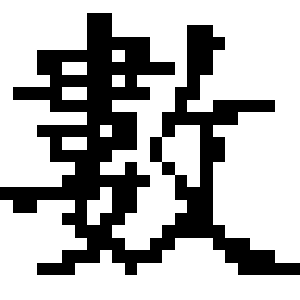

In [12]:
def et24code(w):
    """parse Eten Chinese 24 font to np.array"""
    a = np.frombuffer(w.encode('big5'), dtype='uint8')
    h, l = np.int32(a).reshape(-1, 2).T
    c = (h-161)*157 + l - np.where(l<161, 63, 97)
    return c - np.where(c<=5872, 472, 6281 )

f24 = np.fromfile('data/STDFONT.24K', dtype='uint8')
f24 = np.unpackbits(f24).reshape(-1, 24, 24)*255
f24 = np.repeat(f24[..., None], axis=3, repeats=3)
pixels = 255-f24[et24code("仙")].reshape(-1,24,3)
Image.fromarray(pixels).resize((300,300), Image.NEAREST)

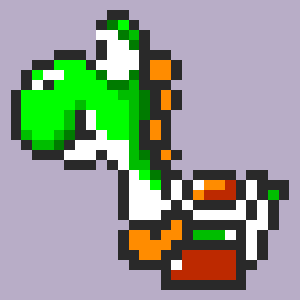

In [3]:
# other available images
#pixels = np.array(Image.open('img/smw_yoshi_input.png'))
#pixels = np.array(Image.open('img/invaders_02_input.png'))
#Image.fromarray(pixels).resize((300,300), Image.NEAREST)

In [13]:
palette =  list(set(tuple(x) for x in pixels.reshape(-1, 3)))
palette

[(0, 0, 0), (255, 255, 255)]

In [14]:
reverse_palette = {c:i for i, c in enumerate(palette)}

In [15]:
h, w = pixels.shape[:2]
X = np.mgrid[0:h, 0:w].reshape(2, -1).T
y = np.array([reverse_palette[tuple(x)] for x in pixels.reshape(-1,3)])

In [16]:
X = X.astype('float64')

In [17]:
X=np.concatenate([X, X+[.1,.1], X+[.1,-.1], X+[-.1,.1], X+[-.1,-.1]])
y = np.concatenate([y,y,y,y,y])

In [18]:
from matplotlib.colors import LinearSegmentedColormap
cm= LinearSegmentedColormap.from_list(
        "cmm", np.array(palette)/255 )
matplotlib.rcParams['figure.figsize']=(10,10*h/w)

In [19]:
clf=svm.NuSVC(nu=0.01, kernel='poly', degree=5,
            decision_function_shape='ovr', gamma=1/10)
X_mean = X.mean(axis=0,keepdims=True)
X_std = X.std()/10
clf.fit((X-X_mean)/X_std, y)

# 邊界
# boundary
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
# grid points
grid  = np.mgrid[x_min:x_max:800j, y_min:y_max:800j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
# calculate the decision function at the grid points
Z = clf.predict( (grid.reshape(2, -1).T-X_mean)/X_std)

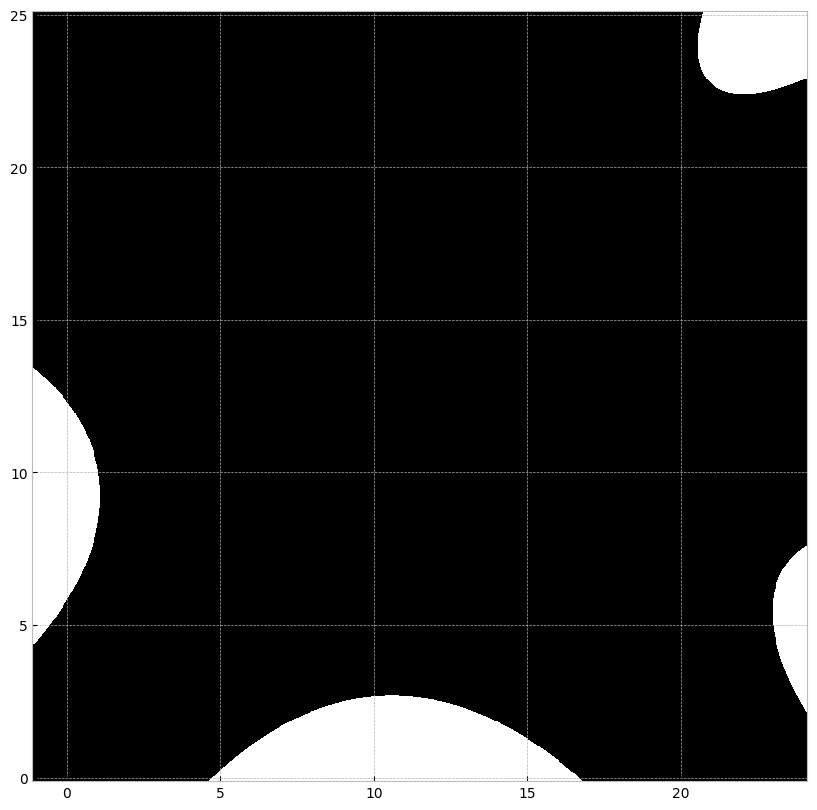

In [20]:
Z  = Z.reshape(grid.shape[1:])
plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);

# The following examples, provided in an as-is basis

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
#clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=1.)

clf=MLPClassifier(hidden_layer_sizes=(256,64), learning_rate_init=1e-3, max_iter=1500, solver="lbfgs")
#clf = BaggingClassifier(MLPClassifier(hidden_layer_sizes=(512,), learning_rate_init=1e-3, max_iter=1000, solver="lbfgs"), max_samples=0.5, max_features=1.)

X_mean = X.mean(axis=0,keepdims=True)
X_std = X.std(keepdims=True)
W = (X - X_mean)/X_std
X2 = np.concatenate( [W, W**2, (W[:, 0]*W[:, 1])[:, None] ], axis= 1)
X2_mean = X2.mean(axis=0,keepdims=True)
X2_std = X2.std(keepdims=True)

clf.fit((X2-X2_mean)/X2_std, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:800j, y_min:y_max:800j]
W = (grid.reshape(2, -1).T - X_mean)/X_std
W2 = np.concatenate( [W, W**2,  (W[:, 0]*W[:, 1])[:, None] ], axis= 1)
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.predict( (W2-X2_mean)/X2_std )

In [13]:
Z2 = Z[::, ::]

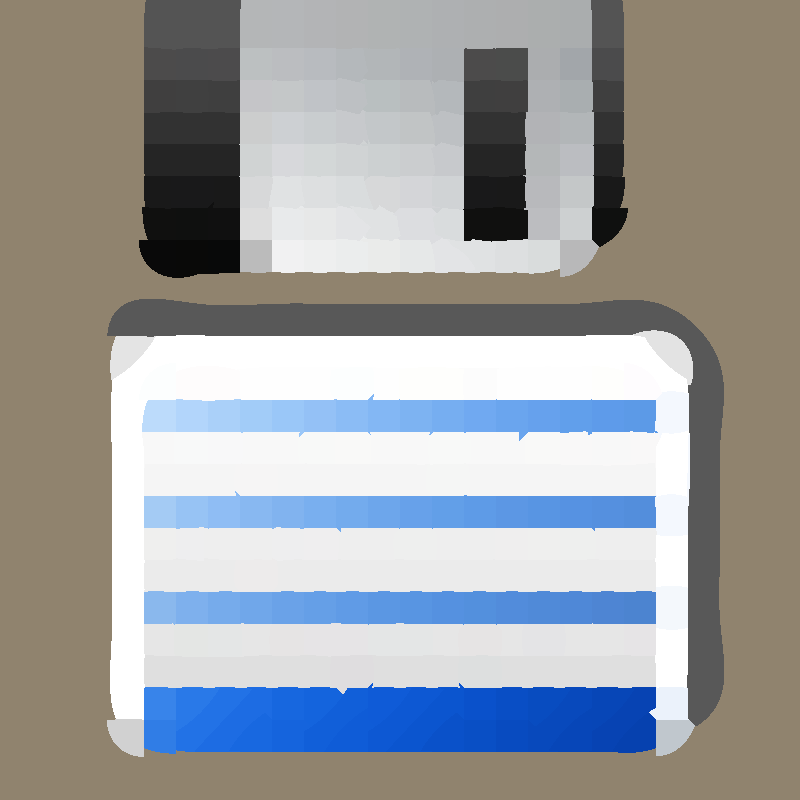

In [14]:
Image.fromarray(np.uint8([palette[z] for z in Z2.ravel()]).reshape(Z2.shape+(3,)))

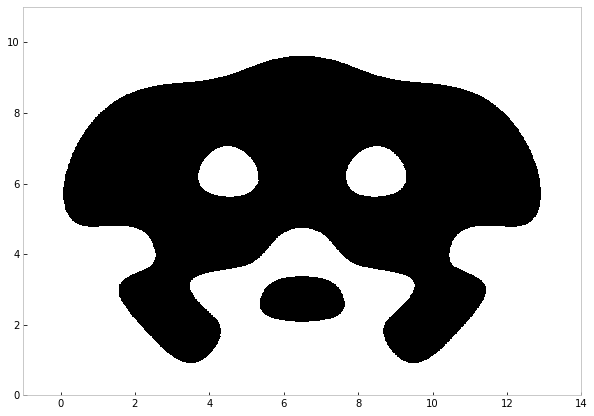

In [201]:
    plt.pcolormesh(grid[1], h-grid[0], Z>0, cmap=cm, alpha=1);


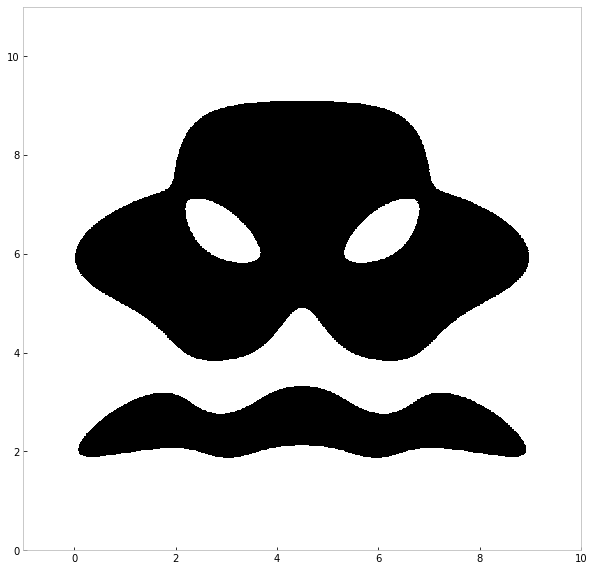

In [189]:
    plt.pcolormesh(grid[1], h-grid[0], Z>0, cmap=cm, alpha=1);


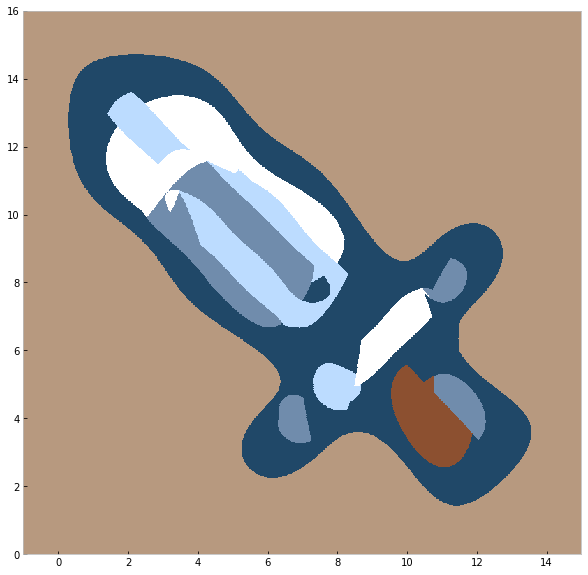

In [225]:
plt.pcolormesh(grid[1], h-grid[0], Z.argmax(axis=2), cmap=cm, alpha=1);


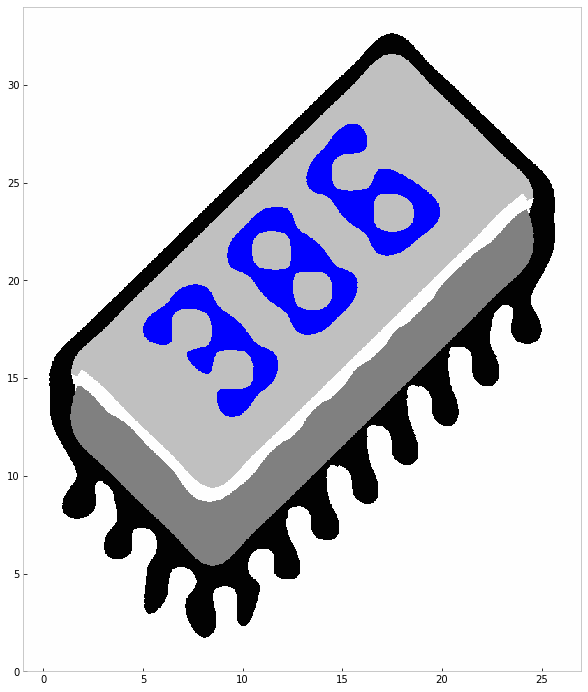

In [239]:
plt.pcolormesh(grid[1], h-grid[0], Z.argmax(axis=2), cmap=cm, alpha=1);


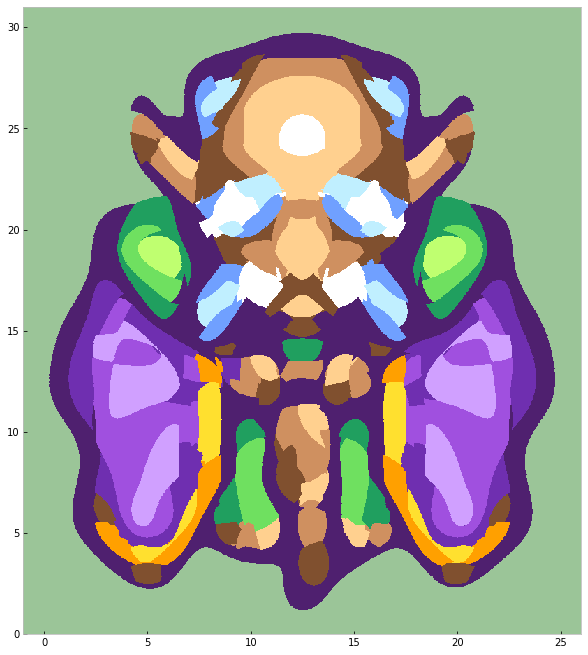

In [212]:
plt.pcolormesh(grid[1], h-grid[0], Z.argmax(axis=2), cmap=cm, alpha=1);


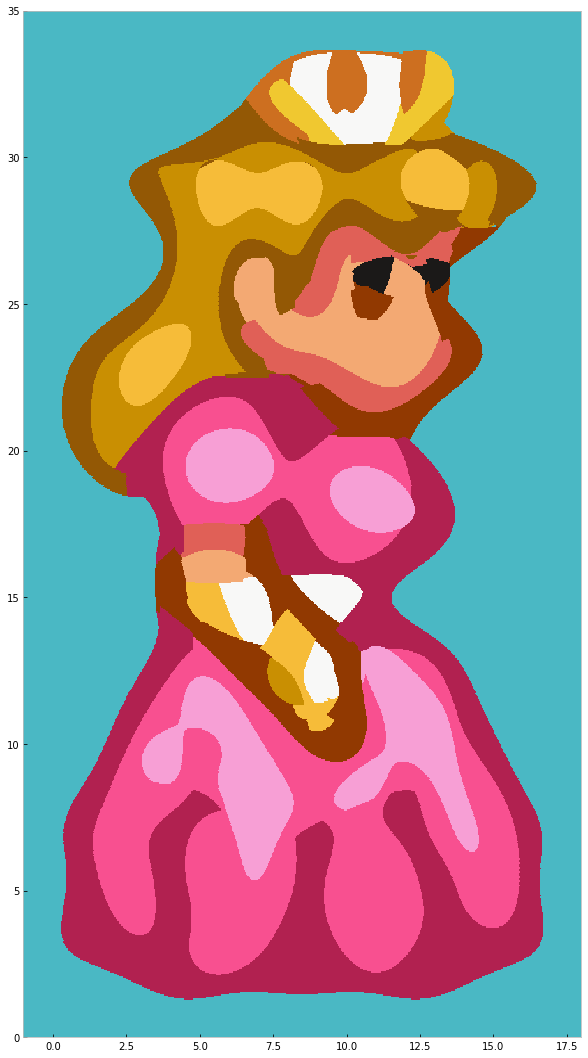

In [175]:
plt.pcolormesh(grid[1], h-grid[0], Z.argmax(axis=2), cmap=cm, alpha=1);


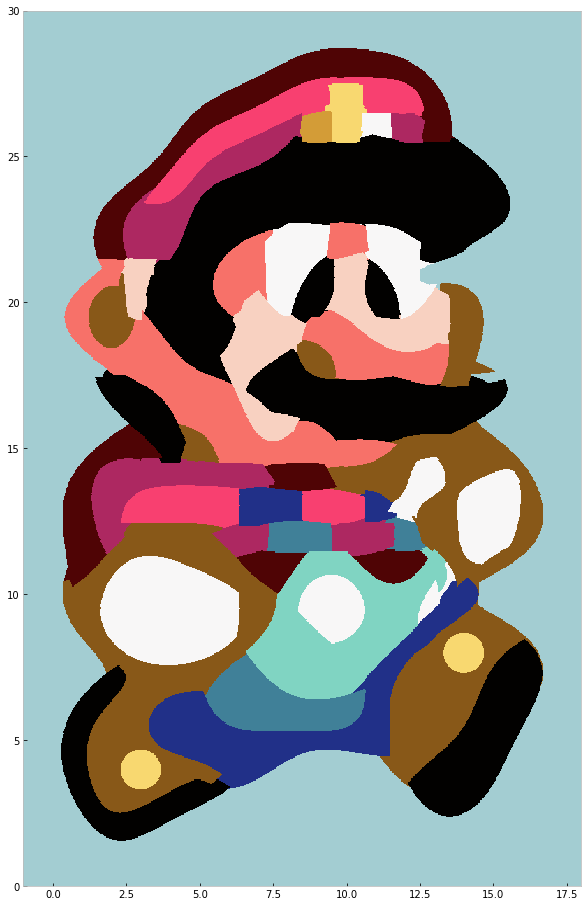

In [153]:
plt.pcolormesh(grid[1], h-grid[0], Z.argmax(axis=2), cmap=cm, alpha=1);


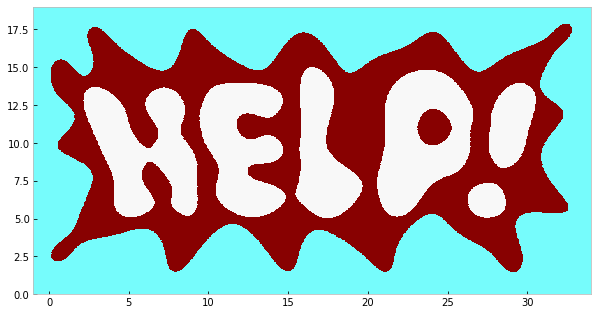

In [142]:
plt.pcolormesh(grid[1], h-grid[0], Z.argmax(axis=2), cmap=cm, alpha=1);


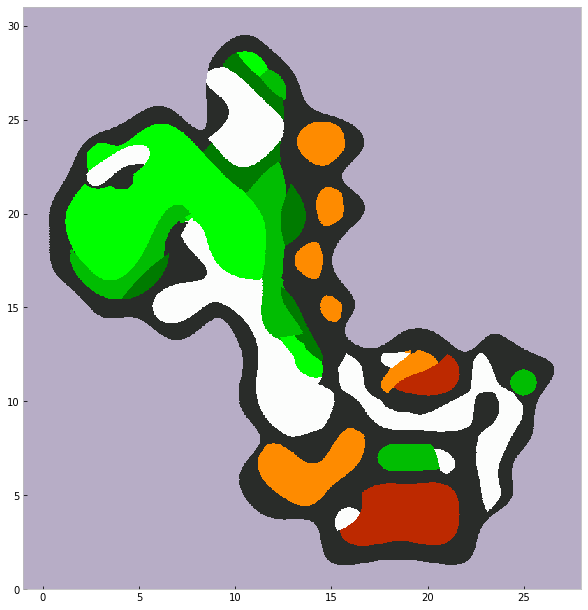

In [114]:
plt.pcolormesh(grid[1], h-grid[0], Z.argmax(axis=2), cmap=cm, alpha=1);
